In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from io import StringIO
import requests
import json
import pandas as pd
%matplotlib inline

In [2]:
# The code was removed by DSX for sharing.

In [3]:
df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_a860223228054eadb78455bad5266913('ITTProject', 'prove.csv'), sep=";")

df_data_11 = df_data_1.copy()
df_data_1["Disco"] = df_data_1["Disco"].astype("category")
cat_columns = df_data_1.select_dtypes(["category"]).columns
df_data_1[cat_columns] = df_data_1[cat_columns].apply(lambda x: x.cat.codes)
df_data_1.head()

,Material,Usura_mat_mm,Usura_mat_g,Usura_disco_g,Durezza_Disco,CodPinza,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,...,Vmax,Rendimento,Indice_misura,Attrezzatura,Raggio_ruota,Area_pistone,CodImpianto,Raggio_medio,Disco_nuovo,Disco
0,9482,0.55,6.7,8.0,164,1,166,167,753,768,...,190,1,2,0,308,22.9,0,117.7,0,4
1,9799,0.54,9.7,5.0,169,1,194,184,740,742,...,195,1,2,0,308,22.9,1,118.0,0,3
2,16136,0.50,8.9,5.0,196,1,196,194,768,743,...,195,1,2,0,308,22.9,2,104.0,0,0
3,19269,0.36,7.9,6.0,194,1,194,190,0,0,...,195,1,2,0,308,22.9,2,104.0,0,0
4,19269,0.58,8.8,5.4,190,1,213,195,0,0,...,190,1,1,0,308,22.9,3,117.7,0,4


In [4]:
df_data_1.describe()

,Material,Usura_mat_mm,Usura_mat_g,Usura_disco_g,Durezza_Disco,CodPinza,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,...,Vmax,Rendimento,Indice_misura,Attrezzatura,Raggio_ruota,Area_pistone,CodImpianto,Raggio_medio,Disco_nuovo,Disco
count,653.000000,653.00000,653.000000,653.000000,653.000000,653.000000,653.000000,650.000000,653.000000,653.000000,...,653.000000,653,653.000000,653.000000,653.000000,653.000000,652.000000,653.000000,653.000000,653.000000
mean,20668.571210,1.05611,13.232006,7.838285,198.894334,1.217458,175.343032,175.313846,208.984686,208.453292,...,191.012251,1,1.986217,0.001531,307.623277,22.996294,5.881902,110.135375,0.009188,2.225115
std,6272.771726,0.70927,7.996596,8.604602,25.954825,1.284118,43.668705,44.198669,328.141602,327.358947,...,5.431941,0,0.116677,0.039133,2.873970,0.493346,3.900039,6.761052,0.095488,1.410906
min,8951.000000,0.21000,5.600000,-0.100000,146.000000,0.000000,37.000000,36.000000,0.000000,0.000000,...,169.000000,1,1.000000,0.000000,290.000000,22.900000,0.000000,104.000000,0.000000,0.000000
25%,15761.000000,0.64000,8.600000,4.700000,180.000000,0.000000,147.000000,146.000000,0.000000,0.000000,...,185.000000,1,2.000000,0.000000,308.000000,22.900000,1.000000,104.000000,0.000000,1.000000
50%,23292.000000,0.91000,11.000000,7.000000,194.000000,1.000000,173.000000,173.000000,0.000000,0.000000,...,190.000000,1,2.000000,0.000000,308.000000,22.900000,7.000000,104.000000,0.000000,1.000000
75%,25291.000000,1.18000,14.700000,10.000000,213.000000,1.000000,198.000000,197.000000,623.000000,625.000000,...,195.000000,1,2.000000,0.000000,308.000000,22.900000,8.000000,117.700000,0.000000,4.000000
max,29526.000000,8.69000,101.800000,194.700000,305.000000,4.000000,481.000000,489.000000,930.000000,867.000000,...,215.000000,1,2.000000,1.000000,315.000000,25.520000,15.000000,118.000000,1.000000,4.000000


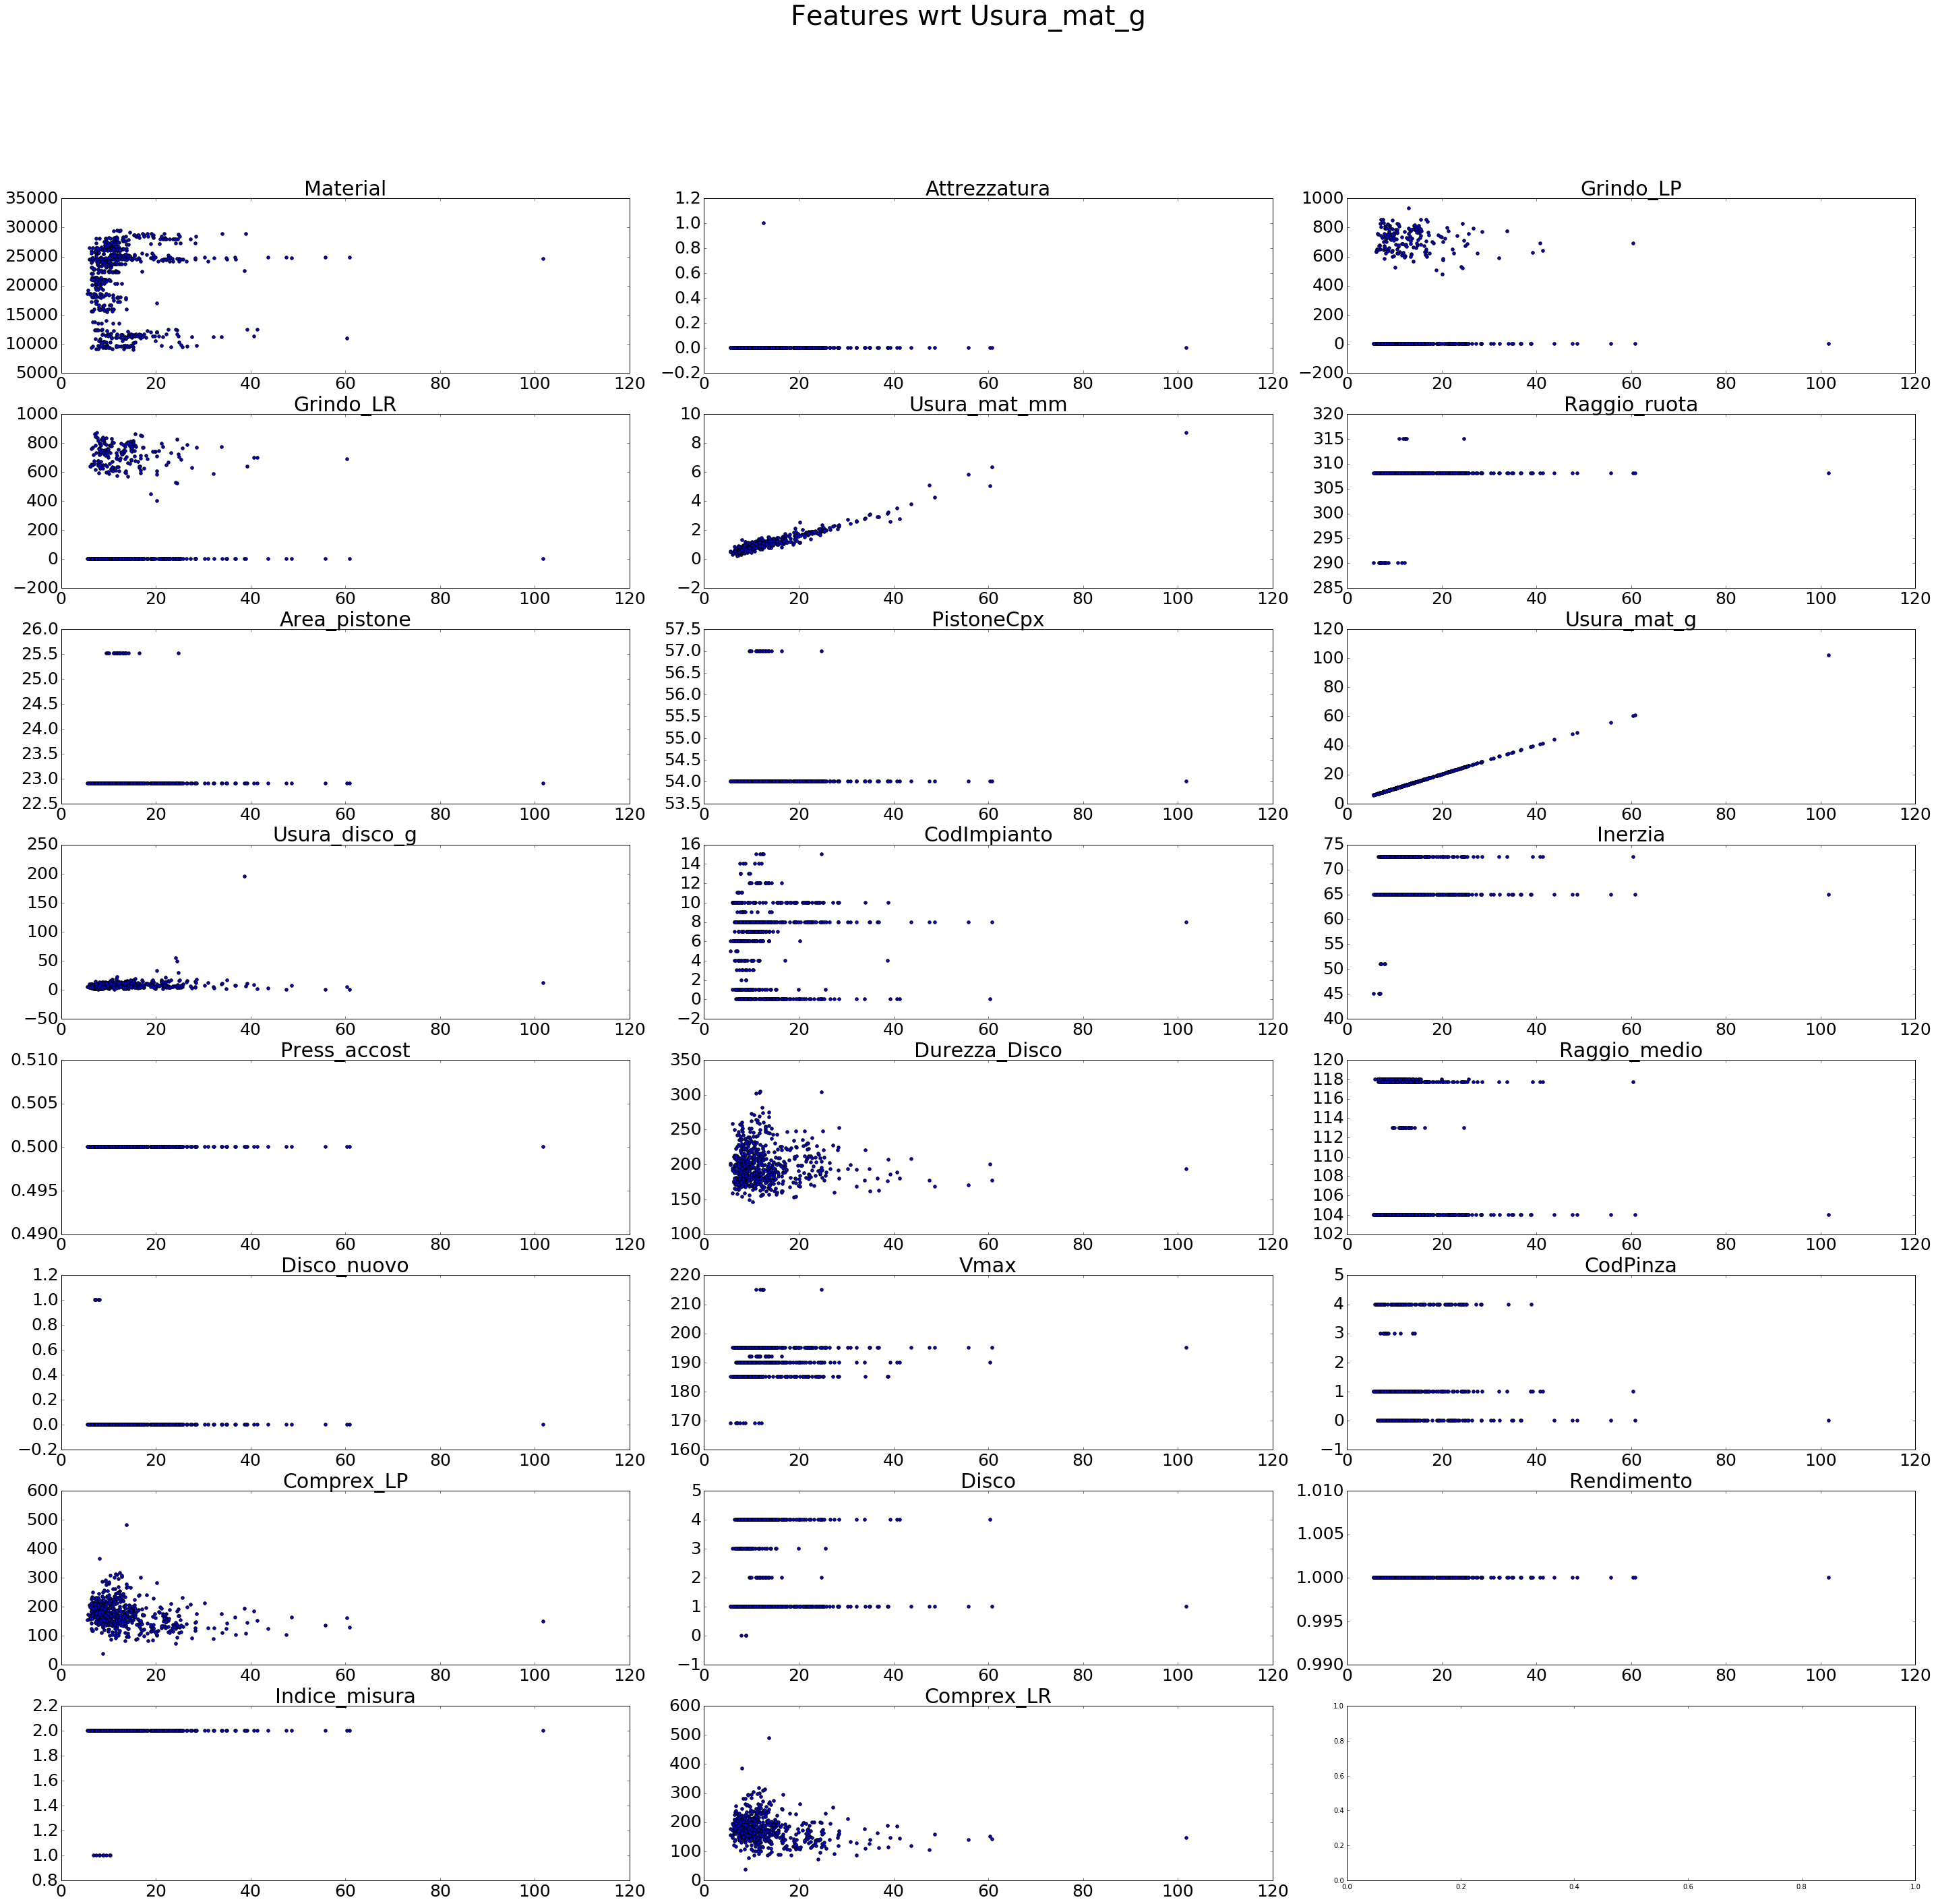

In [5]:
fig, axarr = plt.subplots(8, 3,figsize=(40, 40))
fig.suptitle("Features wrt Usura_mat_g", fontsize=40)

for index,col in enumerate(df_data_1.columns):
    i = index%8
    j = index%3
    axarr[i,j].scatter(df_data_1['Usura_mat_g'], df_data_1[col])
    axarr[i,j].set_title(col, size=30)
    axarr[i,j].tick_params(labelsize=25)
    
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

In [6]:
df_data_11 = df_data_11.drop("Usura_mat_mm",1)
df_data_11 = df_data_11.drop("Usura_disco_g",1)
df_data_11 = df_data_11.drop("Attrezzatura",1)
df_data_11 = df_data_11.drop("Raggio_ruota",1)
df_data_11 = df_data_11.drop("Disco_nuovo",1)
df_data_11 = df_data_11.drop("Press_accost",1)
df_data_11 = df_data_11.drop("Indice_misura",1)
df_data_11 = df_data_11.drop("Rendimento",1)

In [ ]:
df_data_2 = pd.get_dummies(df_data_11, columns=["CodPinza","CodImpianto","Disco", "Vmax", "Area_pistone",
                                                "PistoneCpx", "Inerzia", "Raggio_medio"])

In [ ]:
print "Data-dimension as loaded: " + str(df_data_1.shape)
print "Data-dimension after drop: " + str(df_data_11.shape)
print "Data-dimension OHE: " + str(df_data_2.shape)

In [7]:
df_data_2.head()

,Material,Usura_mat_g,Durezza_Disco,CodPinza,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,PistoneCpx,Inerzia,Vmax,Area_pistone,CodImpianto,Raggio_medio,Disco
0,9482,6.7,164,1,166,167,753,768,54,72.5,190,22.9,0,117.7,280x22
1,9799,9.7,169,1,194,184,740,742,54,65.0,195,22.9,1,118.0,280X22
2,16136,8.9,196,1,196,194,768,743,54,65.0,195,22.9,2,104.0,256X22
3,19269,7.9,194,1,194,190,0,0,54,65.0,195,22.9,2,104.0,256X22
4,19269,8.8,190,1,213,195,0,0,54,72.5,190,22.9,3,117.7,280x22


In [8]:
df_data_2 = df_data_2.set_index(['Material'], drop=False)
df_data_2.index.name = None
print df_data_2.shape
df_data_2.head()

(653, 15)


,Material,Usura_mat_g,Durezza_Disco,CodPinza,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,PistoneCpx,Inerzia,Vmax,Area_pistone,CodImpianto,Raggio_medio,Disco
9482,9482,6.7,164,1,166,167,753,768,54,72.5,190,22.9,0,117.7,280x22
9799,9799,9.7,169,1,194,184,740,742,54,65.0,195,22.9,1,118.0,280X22
16136,16136,8.9,196,1,196,194,768,743,54,65.0,195,22.9,2,104.0,256X22
19269,19269,7.9,194,1,194,190,0,0,54,65.0,195,22.9,2,104.0,256X22
19269,19269,8.8,190,1,213,195,0,0,54,72.5,190,22.9,3,117.7,280x22


In [9]:
df_data_2.to_csv('cleaned_prove.csv', index=True)

In [10]:
put_object_storage_file_with_credentials_a860223228054eadb78455bad5266913('ITTProject', 'cleaned_prove.csv')

<Response [201]>
